In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
college = pd.read_csv('college_data.csv')
college.head(3)

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [3]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [4]:
college.columns

Index(['private', 'apps', 'accept', 'enroll', 'top10perc', 'top25perc',
       'f_undergrad', 'p_undergrad', 'outstate', 'room_board', 'books',
       'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni', 'expend',
       'grad_rate'],
      dtype='object')

<AxesSubplot:xlabel='room_board', ylabel='grad_rate'>

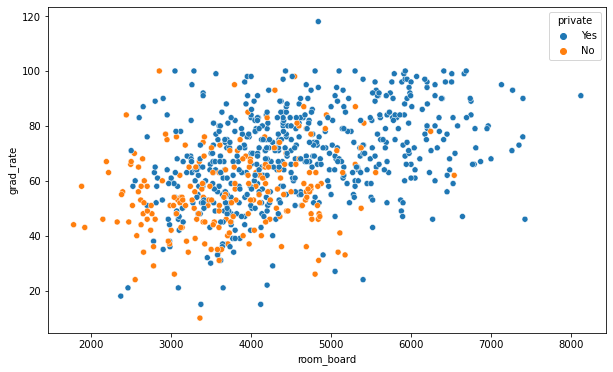

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='room_board',y= 'grad_rate', data=college, hue='private')

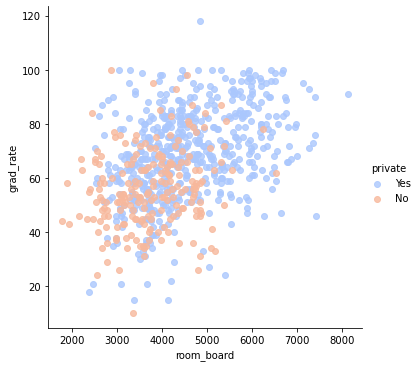

In [6]:
sns.lmplot(x='room_board',y= 'grad_rate', data=college, hue='private' ,fit_reg=False, palette='coolwarm')

<AxesSubplot:xlabel='outstate', ylabel='f_undergrad'>

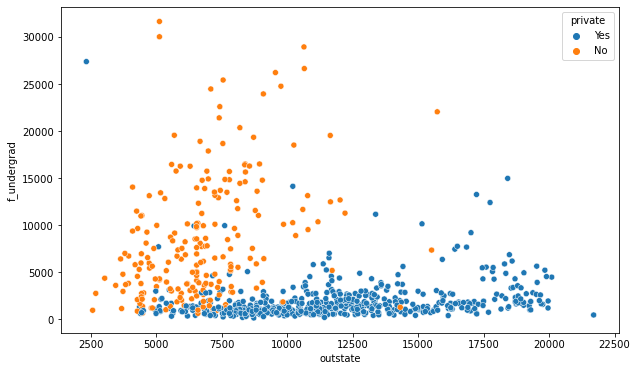

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='outstate', y='f_undergrad', data=college, hue='private')

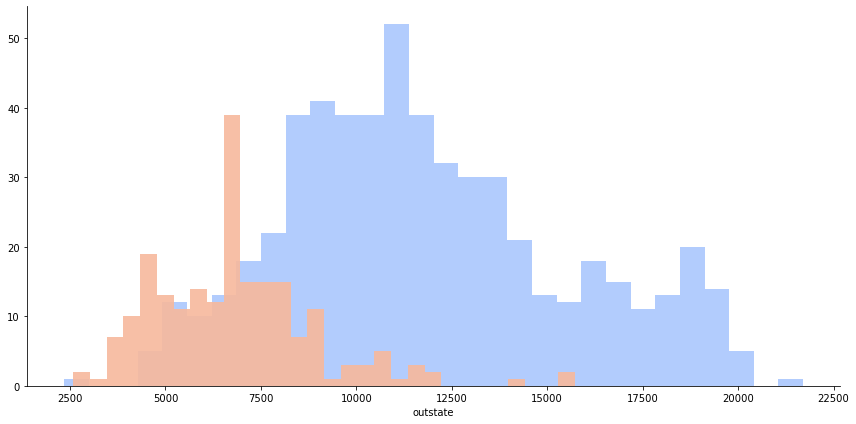

In [8]:
g = sns.FacetGrid(college,hue='private',palette='coolwarm',height=6,aspect=2)
E = g.map(plt.hist,'outstate',bins=30, alpha=0.9)

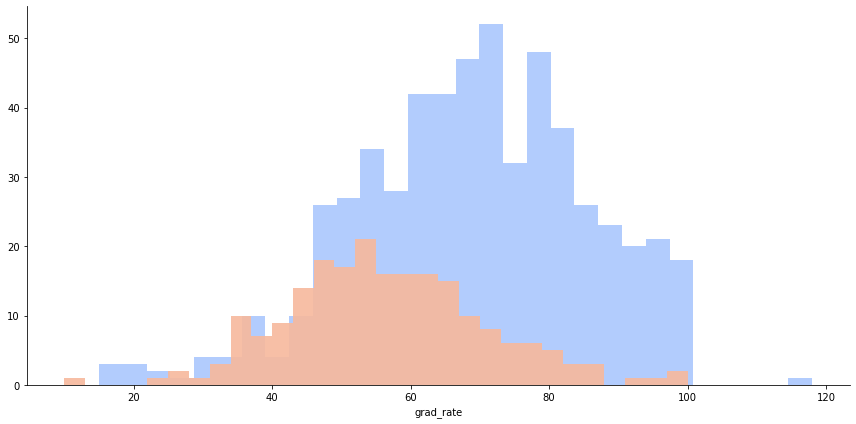

In [9]:
h = sns.FacetGrid(college,hue='private',palette='coolwarm',height=6,aspect=2)
j = h.map(plt.hist,'grad_rate',bins=30, alpha=0.9)

In [10]:
college[college['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
college['grad_rate'][95]=100

<ipython-input-11-43abd2d376af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college['grad_rate'][95]=100


In [12]:
college[college['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [14]:
kmeans.fit(college.drop('private', axis =1))

KMeans(n_clusters=2)

In [15]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [16]:
def converta(private):
    if private == 'Yes':
        return 1
    else:
        return 0

In [17]:
college['cluster']= college['private'].apply(converta)
college

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(college['cluster'],kmeans.labels_))
print('\n')
#print(classification_report(kmeans.labels_,college['cluster']))

[[ 74 138]
 [ 34 531]]




In [20]:
kmeans.score(X_test,y_test)

NameError: name 'X_test' is not defined

In [19]:
drop =['private']
pd.get_dummies(college, columns=drop,drop_first=True )
college['private_Yes']=college['new_private']

KeyError: 'new_private'

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(college['private_Yes'],kmeans.labels_))
print('\n')

KeyError: 'private_Yes'